In [1]:
import os
import cv2 
import numpy as np

In [2]:
# we have labels as NORMAL and PNUEMONIA
# So we will create a data set in which the images which have pnuemonia in their image will have output 1 otherwise 0
def load_data_blur(directory):
    data = []
    data_label = []
    
    for img in os.listdir(directory):
        image = cv2.imread(os.path.join(directory, img) , cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(image , (512,512))
        data.append(resized_image)
        data_label.append(0)
        
    
    return np.array(data) , np.array(data_label)

In [5]:
# we have labels as NORMAL and PNUEMONIA
# So we will create a data set in which the images which have pnuemonia in their image will have output 1 otherwise 0
def load_data_clear(directory):
    data = []
    data_label = []
    
    for img in os.listdir(directory):
        image = cv2.imread(os.path.join(directory, img) , cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(image , (512,512))
        data.append(resized_image)
        data_label.append(1)
        
    
    return np.array(data) , np.array(data_label)

In [4]:
defocused_blur_inputs , defocused_blur_targets = load_data_blur("/kaggle/input/blur-dataset/defocused_blurred")

motion_blur_inputs , motion_blur_targets = load_data_blur("/kaggle/input/blur-dataset/motion_blurred")

clear_image_inputs , clear_image_targets = load_data_clear("/kaggle/input/blur-dataset/sharp") 

In [6]:
go_pro_blur_inputs , go_pro_blur_targets = load_data_blur("/kaggle/input/gopro-deblur/gopro_deblur/blur/images")

go_pro_clear_inputs , go_pro_clear_targets = load_data_clear("/kaggle/input/gopro-deblur/gopro_deblur/sharp/images")


In [7]:
print(f"Image shape: {clear_image_inputs.shape} , Image_targets: {clear_image_targets.shape}")

print(f"Image shape(Go_pro): {go_pro_clear_inputs.shape} , Image_targets: {go_pro_clear_targets.shape}")

Image shape: (350, 512, 512) , Image_targets: (350,)
Image shape(Go_pro): (1029, 512, 512) , Image_targets: (1029,)


In [8]:
defocused_blur_inputs = defocused_blur_inputs.reshape(-1 , 512 , 512 ,1)
defocused_blur_targets = defocused_blur_targets.reshape(-1 , 1)

motion_blur_inputs = motion_blur_inputs.reshape(-1 , 512 , 512 ,1)
motion_blur_targets = motion_blur_targets.reshape(-1 , 1)


clear_image_inputs = clear_image_inputs.reshape(-1 , 512 , 512 ,1)
clear_image_targets = clear_image_targets.reshape(-1 , 1)

go_pro_clear_inputs = go_pro_clear_inputs.reshape(-1 , 512 , 512 ,1)
go_pro_clear_targets = go_pro_clear_targets.reshape(-1 , 1)


go_pro_blur_inputs = go_pro_blur_inputs.reshape(-1 , 512 , 512 ,1)
go_pro_blur_targets = go_pro_blur_targets.reshape(-1 , 1)

In [10]:
print(f"Image shape: {go_pro_blur_inputs.shape} , Image_targets: {go_pro_blur_targets.shape}")

Image shape: (1029, 512, 512, 1) , Image_targets: (1029, 1)


In [11]:
X = np.concatenate((defocused_blur_inputs , clear_image_inputs , go_pro_blur_inputs, go_pro_clear_inputs) , axis=0)
y = np.concatenate((defocused_blur_targets ,clear_image_targets , go_pro_blur_targets, go_pro_clear_targets) , axis=0)

In [12]:
print(f'X Shape: {X.shape}')
print(f'Y shape: {y.shape}')

X Shape: (2758, 512, 512, 1)
Y shape: (2758, 1)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [15]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')

X train shape: (2206, 512, 512, 1)
y train shape: (2206, 1)


In [16]:
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X test shape: (552, 512, 512, 1)
y test shape: (552, 1)


In [17]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255



In [18]:
from keras.models import Sequential
from keras.layers import Input , Conv2D , MaxPooling2D , Flatten , Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint , EarlyStopping

In [19]:
model = Sequential()

model.add(Input(shape=(512,512,1)))
model.add(Conv2D(32,(3,3) , padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3) ,padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3) ,padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3) ,padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512, (3,3) ,padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(1024, (3,3) ,padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam' , loss='binary_crossentropy' , metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 512, 512, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 1024)   │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,097,317 (88.11 MB)

 Trainable params: 23,097,317 (88.11 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train , y_train , epochs=10 , batch_size=32 , validation_data=(X_test , y_test)  , verbose=True)

Epoch 1/10


I0000 00:00:1727783522.840811     108 service.cc:145] XLA service 0x7b2564007790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727783522.840879     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727783522.840886     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1727783554.816814     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/69 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.5452 - loss: 0.6804

2024-10-01 11:53:09.763263: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[30,32,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,64,256,256]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-01 11:53:09.809630: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.046486167s
Trying algorithm eng0{} for conv (f32[30,32,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,64,256,256]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_

69/69 ━━━━━━━━━━━━━━━━━━━━ 91s 830ms/step - accuracy: 0.5473 - loss: 0.6790 - val_accuracy: 0.7989 - val_loss: 0.4205
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.8684 - loss: 0.3378 - val_accuracy: 0.8623 - val_loss: 0.2813
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.8809 - loss: 0.2876 - val_accuracy: 0.9438 - val_loss: 0.1725
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.9339 - loss: 0.1694 - val_accuracy: 0.9475 - val_loss: 0.1227
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - accuracy: 0.9394 - loss: 0.1781 - val_accuracy: 0.8804 - val_loss: 0.2500
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - accuracy: 0.9450 - loss: 0.1350 - val_accuracy: 0.9565 - val_loss: 0.1199
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - accuracy: 0.9638 - loss: 0.1035 - val_accuracy: 0.9583 - val_loss: 0.1418
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.9739 - loss: 0.0760 - val_accuracy: 0.965

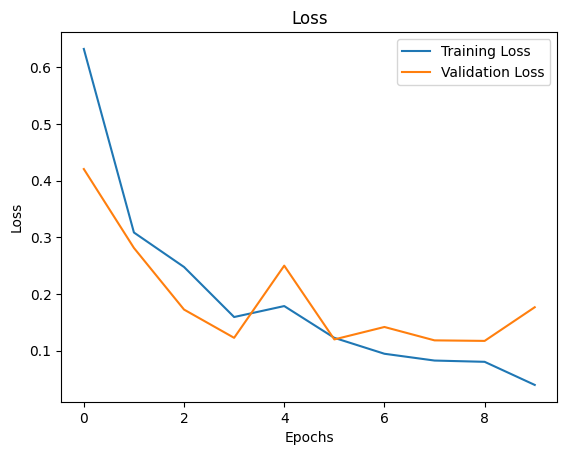

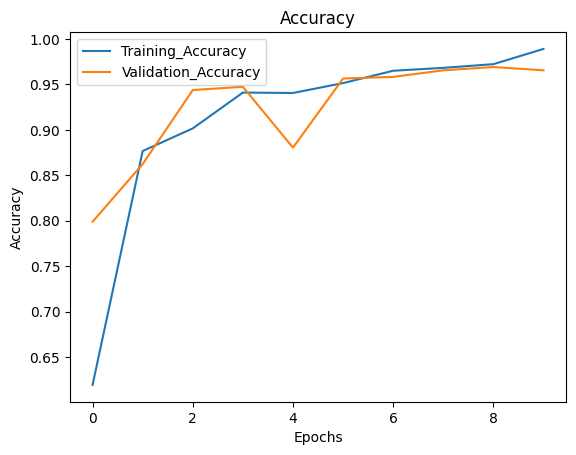

In [21]:
# Plotting the graphs of Loss and Accuracy
from matplotlib import pyplot as plt
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy']  , label = 'Training_Accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation_Accuracy')
plt.legend()
plt.show()

In [22]:
# Checking the accuracy and loss of model
loss , accuracy = model.evaluate(X_test , y_test)
print(f"Accuracy: {100*accuracy}%")
print(f'Loss:  {loss}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9666 - loss: 0.1908
Accuracy: 96.55796885490417%
Loss:  0.1766526699066162


In [23]:
# Predicting the values from model
prediction = model.predict(X_test)

y_pred = (prediction > 0.5).astype(int)
# print(y_pred)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


In [24]:
# Classification metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , precision_recall_fscore_support
accuracy = accuracy_score(y_test,y_pred)
precision , recall , fscore ,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

In [36]:
print(f'Accuracy Score: {accuracy:.4f}')
print(f'Precision Score: {precision:.4f}')
print(f'recall Score: {recall:.4f}')
print(f'fscore Score: {fscore:.4f}')
print("Confusion Matrix")
print(conf_matrix)
print("classification_report")
print(class_report)

Accuracy Score: 0.9656
Precision Score: 0.9604
recall Score: 0.9709
fscore Score: 0.9656
Confusion Matrix
[[266  11]
 [  8 267]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       277
           1       0.96      0.97      0.97       275

    accuracy                           0.97       552
   macro avg       0.97      0.97      0.97       552
weighted avg       0.97      0.97      0.97       552



In [34]:
!pip install pyheif

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.3 MB/s eta 0:00:0000:0100:01


In [50]:
# Testing on output image
test_image_path = "/kaggle/input/temp-1/temp/Screenshot 2023-12-19 104024.png"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image , (512,512))
test_image = test_image.reshape((1,512,512,1))
test_image = test_image.astype('float32')/255
test_output = model.predict(test_image)

if  test_output[0][0]>0.5:
    print(test_output[0][0])
    print(f'Image is Clear')
    
else:
    print(test_output[0][0])
    print(f'Image is Blur')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1.0
Image is Clear


In [51]:
# Testing on output image
i = 0;
for img in os.listdir("/kaggle/input/gopro-deblur/gopro_deblur/blur/images"):
    
    test_image_path = os.path.join("/kaggle/input/gopro-deblur/gopro_deblur/blur/images",img)

    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    test_image = cv2.resize(test_image , (512,512))
    test_image = test_image.reshape((1,512,512,1))
    test_image = test_image.astype('float32')/255
    test_output = model.predict(test_image)

    if  test_output[0][0]>0.5:
        print(test_output[0][0])
        print(f'Image is Clear')
    else:
        print(test_output[0][0])
        print(f'Image is Blur')
        
    i = i + 1
    if(i>10):
        break
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.0017040669
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.0003353322
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.0027931533
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.0025741777
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.00078433374
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0017740071
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0008868775
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.0018393331
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0014196166
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0013302818
Image is Blur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0010425603
Image is Blur


In [52]:
model.save("saved_model/blurORclear.h5")